In [1]:
from bs4 import BeautifulSoup
from lxml import html
from lxml import etree
import xml
import requests

In [2]:
url = "https://warframe.market/items/volt_prime_set"
r = requests.get(url).text

s=etree.HTML(r)

trade=s[4].text

print(trade[0:600])

{"payload": {"orders": [{"creation_date": "2016-09-19T11:01:01.000+00:00", "visible": true, "quantity": 1, "user": {"ingame_name": "Neouni", "last_seen": "2019-02-25T08:02:37.861+00:00", "reputation_bonus": 0, "reputation": 0, "region": "en", "status": "offline", "id": "568688d6cbfa8f126f9f85a8", "avatar": null}, "last_update": "2019-02-18T15:43:30.000+00:00", "platinum": 360, "order_type": "sell", "region": "en", "platform": "pc", "id": "57dfc56d0f313917d21ad753"}, {"quantity": 1, "visible": true, "creation_date": "2017-02-18T18:03:42.000+00:00", "user": {"ingame_name": "FLOWER_PRIME", "last_


In [3]:
import json
import pandas as pd
from pandas.io.json import json_normalize

In [4]:
data=json.loads(trade)
data1=data['payload']['orders']
print(data1[10])

{'creation_date': '2017-10-02T02:13:57.000+00:00', 'visible': True, 'quantity': 1, 'user': {'ingame_name': 'Supportif-Arkadas', 'last_seen': '2019-02-24T16:12:13.784+00:00', 'reputation_bonus': 0, 'reputation': 7, 'region': 'en', 'avatar': 'user/avatar/590b23fa0f31393d6cbcda45.png?6f3923552bf4794778c50c10520d8bb2', 'status': 'offline', 'id': '590b23fa0f31393d6cbcda45'}, 'last_update': '2018-11-16T09:29:20.000+00:00', 'platinum': 400, 'order_type': 'sell', 'region': 'en', 'platform': 'pc', 'id': '59d1a0e50f313922c654cf6b'}


In [5]:
print(data1[30]['creation_date'][0:10])

2018-02-20


In [6]:
print(data1[30]['user']['ingame_name'])

Black-Kryptonite


In [7]:
import matplotlib
matplotlib.use('Agg')
from datascience import Table
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')

In [8]:
name=np.array([])
reputation=np.array([])
platinum=np.array([])
order_type=np.array([])
creat_time=np.array([])
region=np.array([])
platform=np.array([])
status=np.array([])

In [9]:
for i in range (0,400):
    name=np.append(name,data1[i]['user']['ingame_name'])
    reputation=np.append(reputation,data1[i]['user']['reputation'])
    platinum=np.append(platinum,data1[i]['platinum'])
    order_type=np.append(order_type,data1[i]['order_type'])
    creat_time=np.append(creat_time,data1[i]['creation_date'][0:10])
    region=np.append(region,data1[i]['region'])
    platform=np.append(platform,data1[i]['platform'])
    status=np.append(status,data1[i]['user']['status'])
print(name[0:20])

['Neouni' 'FLOWER_PRIME' 'kanoOm' 'Locky3d' 'DuraHaaa' 'mateuzin280'
 '-CNY-CzechuPL' 'Blacksshadow' '-MaxSKILL-' 'MarioZzQC'
 'Supportif-Arkadas' 'aloeblacc' 'Alefx69' 'xNoRealLife' 'Uniforce'
 '--Q--DucatMaster' 'JohnVane' '--RV--Sloth' 'flying_spaghetti_monster'
 '-BONUS-']


In [10]:
trading=Table().with_columns('gameID',name,'status',status,'order_type',order_type,'platinum',platinum,'region',region,'reputation',reputation,'creat_time',creat_time)
trading

gameID,status,order_type,platinum,region,reputation,creat_time
Neouni,offline,sell,360,en,0,2016-09-19
FLOWER_PRIME,ingame,buy,280,en,58,2017-02-18
kanoOm,offline,sell,349,en,107,2017-02-22
Locky3d,offline,sell,400,en,1,2017-04-14
DuraHaaa,offline,sell,350,en,4,2017-05-18
mateuzin280,offline,sell,400,en,0,2017-05-26
-CNY-CzechuPL,offline,sell,340,en,0,2017-06-17
Blacksshadow,offline,sell,399,en,53,2017-08-16
-MaxSKILL-,offline,sell,350,en,15,2017-08-20
MarioZzQC,offline,sell,400,en,32,2017-09-30


In [11]:
trading_sell=trading.where(2,'sell').sort(3)
trading_sell

gameID,status,order_type,platinum,region,reputation,creat_time
Sid0y,offline,sell,300,ru,0,2018-10-05
MercerRed,offline,sell,300,en,5,2019-01-23
Alex-Lyon,offline,sell,300,ru,0,2019-02-09
NeuroJFORCE,offline,sell,300,en,0,2019-02-10
Killstiel,offline,sell,310,en,0,2019-02-15
V3noMic,offline,sell,315,en,4,2019-01-11
-Welewan-CZ,offline,sell,320,en,2,2018-06-11
-MS_Makc-,offline,sell,320,ru,0,2019-02-07
Schtil,offline,sell,320,en,9,2019-02-08
Sano32,offline,sell,324,en,2,2019-02-13


In [12]:
trading_sell_online=trading.where(2,'sell').where(1,'online').sort(3)
trading_sell_online

gameID,status,order_type,platinum,region,reputation,creat_time
DoctorWired,online,sell,400,en,1,2018-05-24


In [13]:
trading_buy=trading.where(2,'buy').sort(3,descending=True)
trading_buy

gameID,status,order_type,platinum,region,reputation,creat_time
Dexir108,offline,buy,320,en,0,2019-02-21
SalvationM,offline,buy,310,en,3,2019-02-06
happy-frame,offline,buy,310,en,6,2018-10-28
kife1212,ingame,buy,305,en,6,2018-11-24
astarmf,offline,buy,303,en,1,2019-01-28
hero.xu,offline,buy,301,en,12,2018-06-03
CTOSL,offline,buy,300,en,1,2019-02-22
hrgjjgcgfxxgt,ingame,buy,300,en,3,2019-02-22
jonlys,offline,buy,300,zh,0,2019-02-21
rightguo,ingame,buy,300,en,2,2019-02-20


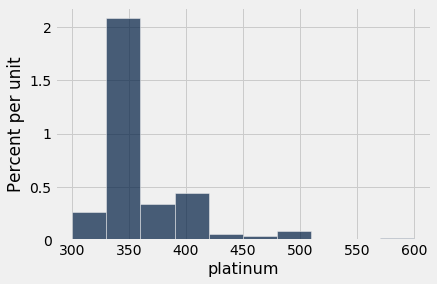

In [14]:
trading_sell.hist(3)

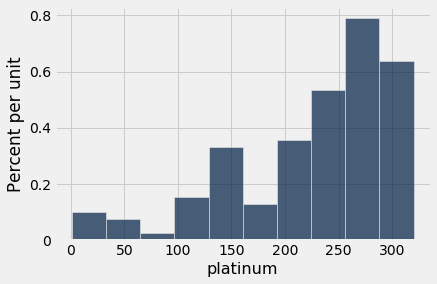

In [15]:
trading_buy.hist(3)

In [16]:
trading.to_csv('Volt Prime.csv')